# Classifying MNIST digits with PyTorch
This notebook builds on the feed forward process in the last notebook. Here, we iteratively calculate loss based on each forward pass, and then use autograd on the loss function to update our weights and biases.

In [1]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(sns.color_palette("Blues_d", n_colors=10, desat=1))

In [2]:
# Define a transform to normalize the data, load data:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# download and load MNIST training data:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [3]:
# using pre-built sequential model rather than custom made class. 
# Equivilent to previous notebook (pytorch04)

# define architecture
input_size   = 784
hidden_sizes = (128,64)
output_size  = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

# Define loss function
criterion = nn.NLLLoss()

# Set up optimizer by keying in parameters for which gradient will be calculated:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
# Train network for 5 epochs

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        images = images.view(images.shape[0], -1)
        loss = criterion(model(images), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        

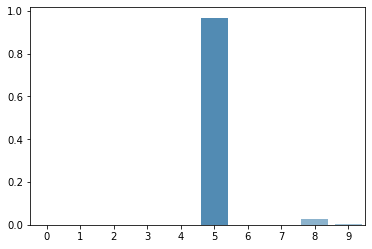

In [6]:
# Get data into an iter:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# get first digit in first batch
digit = images[0].view(1, -1)
logps = model(digit)

# compute probability vector:
ps = torch.exp(logps).squeeze()

# plot probabilities
sns.barplot(x=np.arange(10), y=ps.detach().numpy())

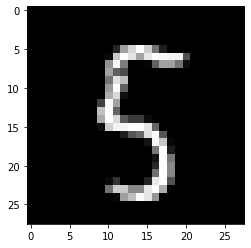

In [7]:
# Show actual digit:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')